# Project 1
## The Net Wars: Attack of the Bots
### Advanced Machine Learning - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# Just to make plots look better
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

|Class  |Label |
| ----- | ---- | 
|Normal	|0     |
|Dos	|1     |
|R2L	|2     |
|U2R	|3     |
|Probe	|4     |

In [2]:
PATH_TO_DATA = 'dataset/'

test_students = pd.read_csv(PATH_TO_DATA + 'test_students.csv')
SampleID = test_students['SampleID']

train_students = pd.read_csv(PATH_TO_DATA + 'train_students.csv')


In [3]:
test_students = test_students.drop('SampleID', axis=1)

### Check Nulls and DataType

In [4]:
print(test_students.info())
print(train_students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44556 entries, 0 to 44555
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     44556 non-null  int64  
 1   protocol_type                44556 non-null  object 
 2   service                      44556 non-null  object 
 3   flag                         44556 non-null  object 
 4   src_bytes                    44556 non-null  int64  
 5   dst_bytes                    44556 non-null  int64  
 6   land                         44556 non-null  int64  
 7   wrong_fragment               44556 non-null  int64  
 8   urgent                       44556 non-null  int64  
 9   hot                          44556 non-null  int64  
 10  num_failed_logins            44556 non-null  int64  
 11  logged_in                    44556 non-null  int64  
 12  num_compromised              44556 non-null  int64  
 13  root_shell      

In [5]:
train_students.replace('normal', 0, inplace=True)
train_students.replace('Dos', 1, inplace=True)
train_students.replace('R2L', 2, inplace=True)
train_students.replace('U2R', 3, inplace=True)
train_students.replace('Probe', 4, inplace=True)


In [6]:
train_students['attack_type'].value_counts(normalize = True)

0    0.518964
1    0.358846
4    0.095545
2    0.025808
3    0.000837
Name: attack_type, dtype: float64

### Categorical

In [7]:
#Service não contêm o mesmo núemero de valores
train_students = train_students.drop('service', axis=1)
test_students = test_students.drop('service', axis=1)

train_students = pd.get_dummies(train_students, columns=['protocol_type'], drop_first=True)
#train_students = train_students.drop('service', axis=1)
#train_students = pd.get_dummies(train_students, columns=['service'], drop_first=True)
train_students= pd.get_dummies(train_students, columns=['flag'], drop_first=True)

test_students = pd.get_dummies(test_students, columns=['protocol_type'], drop_first=True)
#test_students = test_students.drop('service', axis=1)
#test_students = pd.get_dummies(test_students, columns=['service'], drop_first=True)
test_students= pd.get_dummies(test_students, columns=['flag'], drop_first=True)


In [8]:
y = train_students['attack_type']
X = train_students.drop(columns=['attack_type'], axis=1)

Mean f1: 0.995
Mean recall: 0.995
Mean precision: 0.995


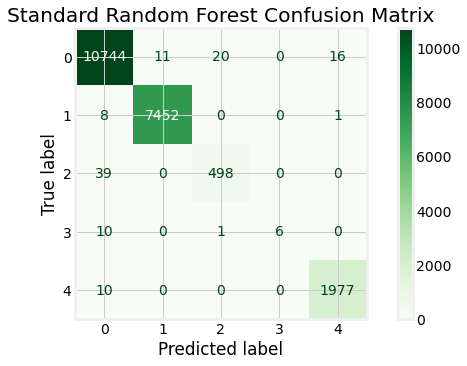

In [9]:
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

#Build SRF model
SRF = RandomForestClassifier(n_estimators=150, random_state=42)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scoring = ('f1_micro', 'recall_micro', 'precision_micro')
#Evaluate SRF model
scores = cross_validate(SRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1_micro']))
print('Mean recall: %.3f' % mean(scores['test_recall_micro']))
print('Mean precision: %.3f' % mean(scores['test_precision_micro']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_test, X_validation, y_test, y_validation = train_test_split(X_t, y_t, test_size=0.5, random_state=42, stratify=y_t)
#Train SRF
SRF.fit(X_train, y_train)
#SRF prediction result
y_pred = SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SRF, X_test, y_test, cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

In [10]:
models = []
models.append(('SRF', y_pred))

Mean f1: 0.922
Mean recall: 0.922
Mean precision: 0.922


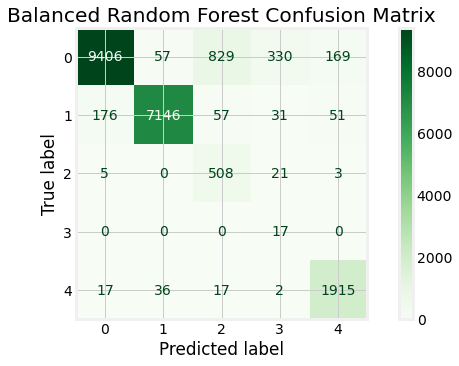

In [11]:
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier

#Build SRF model
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=42)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scoring = ('f1_micro', 'recall_micro', 'precision_micro')
#Evaluate BRFC model
scores = cross_validate(BRFC, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1_micro']))
print('Mean recall: %.3f' % mean(scores['test_recall_micro']))
print('Mean precision: %.3f' % mean(scores['test_precision_micro']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Train BRFC
BRFC.fit(X_train, y_train)
#BRFC prediction result
y_pred = BRFC.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(BRFC, X_test, y_test, cmap='Greens')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

In [12]:
models.append(('BRFC',y_pred))

Mean f1: 0.998
Mean recall: 0.998
Mean precision: 0.998


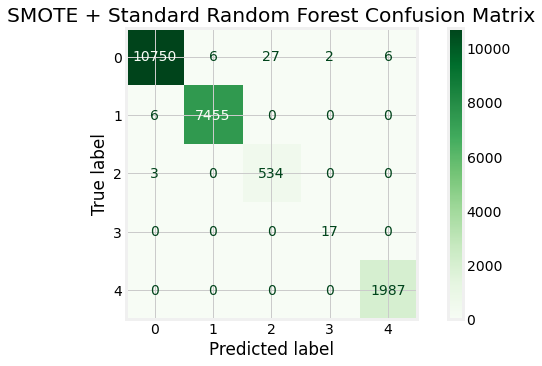

In [13]:
#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y, random_state=42)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=42)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scoring = ('f1_micro', 'recall_micro', 'precision_micro')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1_micro']))
print('Mean recall: %.3f' % mean(scores['test_recall_micro']))
print('Mean precision: %.3f' % mean(scores['test_precision_micro']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

In [14]:
models.append(('SMOTE_SRF', y_pred))

In [15]:
for name, preds in models:
    print(name)
    print(preds.shape)

SRF
(20793,)
BRFC
(20793,)
SMOTE_SRF
(20793,)


### Todos os modelos

In [16]:
from sklearn.metrics import classification_report

for name, preds in models:
    print(name)
    print(classification_report(y_test, preds))
    print('=========================================')

SRF
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10791
           1       1.00      1.00      1.00      7461
           2       0.96      0.93      0.94       537
           3       1.00      0.35      0.52        17
           4       0.99      0.99      0.99      1987

    accuracy                           0.99     20793
   macro avg       0.99      0.85      0.89     20793
weighted avg       0.99      0.99      0.99     20793

BRFC
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10791
           1       0.99      0.96      0.97      7461
           2       0.36      0.95      0.52       537
           3       0.04      1.00      0.08        17
           4       0.90      0.96      0.93      1987

    accuracy                           0.91     20793
   macro avg       0.65      0.95      0.69     20793
weighted avg       0.96      0.91      0.93     20793

SMOTE_SRF
   

### O melhor

In [17]:
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(test_students)

In [19]:
submission = pd.DataFrame({'SampleID': SampleID, 'Class': y_pred})
print(submission)
submission.to_csv('submission_smote.csv', index=False)

       SampleID  Class
0             0      0
1             1      0
2             2      0
3             3      0
4             4      1
...         ...    ...
44551     44551      0
44552     44552      1
44553     44553      1
44554     44554      0
44555     44555      0

[44556 rows x 2 columns]


### Todos os modelos